## Readme:
    This notebook shows the script to treat the NDVI data and prepration of Figure1 and Figure S1,S2. To use the modules listed below, pleae check out the module files at https://github.com/ChaoYue/pylsce

In [1]:
%matplotlib inline

In [5]:
import gnc
import numpy as np
import matplotlib as mat
import pandas as pa
import bmap

In [2]:
cd /home/orchidee01/ychao/DATA/NDVI/

/home/orchidee01/ychao/DATA/NDVI


In [3]:
years = np.arange(2000,2016)
months = pa.date_range('20000101','20151231',freq='M')

### 1 Calculate the rank of NDVI for different seasons of different years

In [4]:
mat.rcParams['figure.figsize'] = (5,3)

In [6]:
d = gnc.Ncdata('MOD13C1.NDVI.Q1.2000.2015.halfdeg.nc')

In [7]:
d_q1 = gnc.Ncdata('MOD13C1.NDVI.Q1.2000.2015.halfdeg.nc')
d_q2 = gnc.Ncdata('MOD13C1.NDVI.Q2.2000.2015.halfdeg.nc')
d_q3 = gnc.Ncdata('MOD13C1.NDVI.Q3.2000.2015.halfdeg.nc')
d_q4 = gnc.Ncdata('MOD13C1.NDVI.Q4.2000.2015.halfdeg.nc')

ndvi_Q1 = d_q1.d1.NDVI
ndvi_Q2 = d_q2.d1.NDVI
ndvi_Q3 = d_q3.d1.NDVI
ndvi_Q4 = d_q4.d1.NDVI

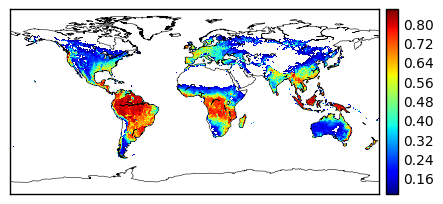

In [9]:
#examine data
d_q1.map('NDVI',mapdim=-1,maptype='img',mapbound=(-90,90,-180,180),map_threshold={'lb':0.1})

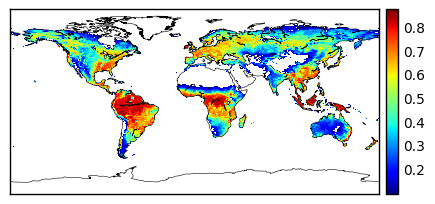

In [10]:
#examine data
d_q2.map('NDVI',mapdim=-1,maptype='img',mapbound=(-90,90,-180,180),map_threshold={'lb':0.1})

In [11]:
ndvi_Q1.shape

(16, 360, 720)

In [264]:
def get_rank_all(arrp):
    """
    If all values are Nan, we return Nan; 
    otherwise if 2015-value is Nan, we return Nan; 
    otherwise we return 2015 rank by putting Nan values
    of other years at the beginning.
    """
    s = pa.Series(arrp,index=np.arange(2000,2016))
    sort_s = s.sort_values(na_position='first')
    ranks = np.ones(16)

    if np.sum(s.isnull()) == 16:
        ranks[:] = np.nan
    else:
        newindex = sort_s.index.tolist()
        for i, year in enumerate(years):
            if pa.isnull(s.ix[year]):
                ranks[i] = np.nan
            else:
                ranks[i] = newindex.index(year)+1
    return ranks

In [265]:
d_q1 = gnc.Ncdata('MOD13C1.NDVI.Q1.2000.2015.halfdeg.nc')
d_q2 = gnc.Ncdata('MOD13C1.NDVI.Q2.2000.2015.halfdeg.nc')
d_q3 = gnc.Ncdata('MOD13C1.NDVI.Q3.2000.2015.halfdeg.nc')
d_q4 = gnc.Ncdata('MOD13C1.NDVI.Q4.2000.2015.halfdeg.nc')

#mask NDVI values lower than 0.1
ndvi_Q1 = np.ma.masked_less(d_q1.d1.NDVI,0.1)
ndvi_Q2 = np.ma.masked_less(d_q2.d1.NDVI,0.1)
ndvi_Q3 = np.ma.masked_less(d_q3.d1.NDVI,0.1)
ndvi_Q4 = np.ma.masked_less(d_q4.d1.NDVI,0.1)

In [268]:
rank_Q1 = np.ma.apply_along_axis(get_rank_all,0,ndvi_Q1)
rank_Q2 = np.ma.apply_along_axis(get_rank_all,0,ndvi_Q2)
rank_Q3 = np.ma.apply_along_axis(get_rank_all,0,ndvi_Q3)
rank_Q4 = np.ma.apply_along_axis(get_rank_all,0,ndvi_Q4)

In [269]:
for i,year in enumerate(range(2000,2016)):
    rank_season = np.ma.dstack([rank_Q1[i],rank_Q2[i],rank_Q3[i],rank_Q4[i]])
    np.save('/home/orchidee01/ychao/DATA/NDVI/NDVI_{0}_rank_season_Taejin_MOD13C1_Min0.1'.format(year),rank_season.filled(-9999.))

### 2 Examine the rank of 2015; make Figure 1a and 1b 

In [7]:
cd /home/orchidee01/ychao/DATA/NDVI/

/home/orchidee01/ychao/DATA/NDVI


In [8]:
%matplotlib inline

In [9]:
d = gnc.Ncdata('MOD13C1.NDVI.Q1.2000.2015.halfdeg.nc')

In [10]:
lat = d.lat
lon = d.lon
area_km2 = mathex.geo_area_latlon(len(lat),len(lon))

In [11]:
data = np.load('/home/orchidee01/ychao/DATA/NDVI/NDVI_2015_rank_season_Taejin_MOD13C1_Min0.1.npy')

In [12]:
mat.rcParams['figure.figsize'] = (6,4)

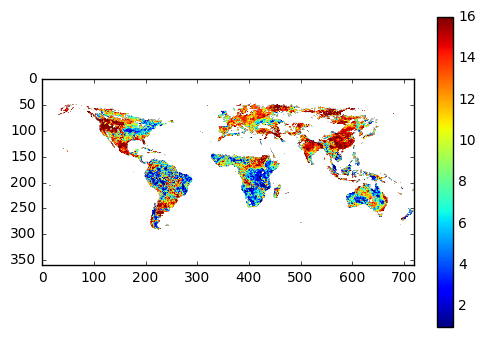

In [13]:
plt.imshow(data[...,0]);plt.colorbar()

In [14]:
rank_Q1 = data[...,0]
rank_Q2 = data[...,1]
rank_Q3 = data[...,2]
rank_Q4 = data[...,3]

(360, 720, 4)


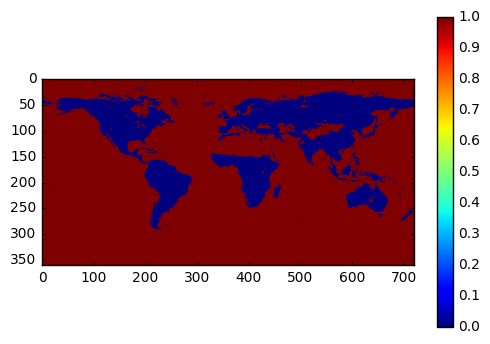

In [15]:
## Get the mask where observations are invalid

rank_season = np.ma.dstack([rank_Q1,rank_Q2,rank_Q3,rank_Q4])
print rank_season.shape

ranks_season_mask = np.ma.masked_invalid(rank_season)
# mask_empty masks the regions where no valid result could be obtained for 2015
mask_empty = np.all(ranks_season_mask.mask,axis=-1)
g.imshow(mask_empty)

In [16]:
seasons = ['Q1','Q2','Q3','Q4']

In [18]:
bmap.rcParams['Antarctica'] = False

In [19]:
d.lat[:-60][[0,1,-2,-1]]

array([ 89.75,  89.25, -59.25, -59.75], dtype=float32)

In [20]:
len(d.lat[:-60])

300

In [21]:
data[:-60,:].shape

(300, 720, 4)

In [22]:
%matplotlib inline

In [23]:
mat.rcParams['figure.figsize'] = (14,6)

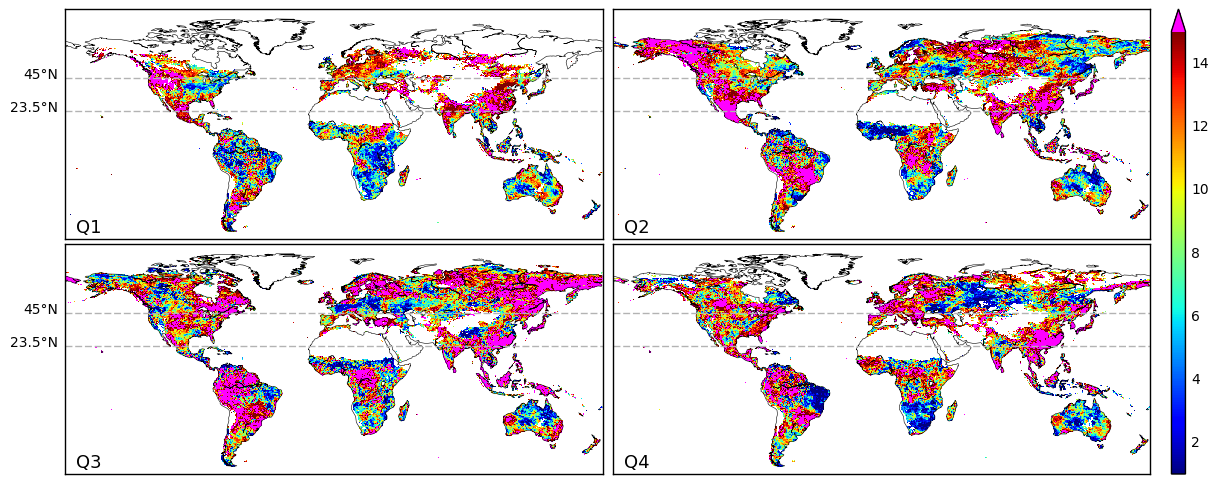

In [24]:
# make Figure S1

fig, axs = plt.subplots(2,2)
axs = axs.flatten(order='C')
plt.subplots_adjust(hspace=0.02,wspace=0.02,right=0.9)

for i,data in enumerate([rank_Q1,rank_Q2,rank_Q3,rank_Q4]):
    axt = axs[i]
    g.Set_AxText(axt,seasons[i],color='k',pos=(0.02,0.03),size=13)
    cmap = mat.cm.jet
    cmap.set_over('magenta')
    gmap = bmap.gmap(ax=axt,lat=d.lat[:-60],lon=d.lon,rlat=(90,-60),rlon=(-180,180))
    cs = gmap.m.imshow(data[:-60,:],vmax=15,cmap=cmap,origin='upper',aspect='auto',interpolation='none');

axt = g.Axes_add_axes(axs[[1,3]],offset=0.015,width=0.01)
plt.colorbar(cs,cax=axt,extend='max',ticks=np.arange(2,16,2),drawedges=False)

map(lambda axtmp:g.Plot_Horizontal_Lines(axtmp,pos=[23.5,45],dashes=(5,2),ls='-',color='0.7'),axs);

axs[0].text(-185,23.5,u'23.5°N',ha='right')
axs[0].text(-185,45,u'45°N',ha='right')

axs[2].text(-185,23.5,u'23.5°N',ha='right')
axs[2].text(-185,45,u'45°N',ha='right')

In [25]:
rank_2015 = np.dstack([rank_Q1==16,rank_Q2==16,rank_Q3==16,rank_Q4==16])
print rank_2015.shape

(360, 720, 4)


In [26]:
mat.rcParams['figure.figsize'] = (6,4)

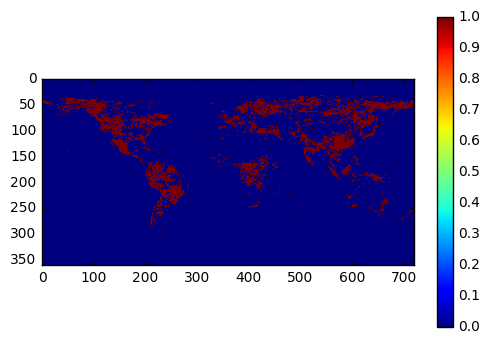

In [27]:
arr_2015_highest = np.any(rank_2015,axis=2)
plt.imshow(arr_2015_highest);plt.colorbar()

1


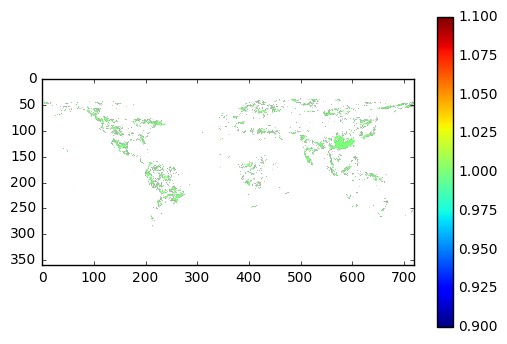

In [29]:
dic_overlap = OrderedDict()
dic_overlap['more_than_one'] = rank_2015.sum(axis=-1)>1
dic_overlap = pb.Dic_Apply_Func(lambda x:np.ma.masked_array(x,x<1),dic_overlap)  # mask the rest and keep on the pixels
                                                                                 # with >2 seasons as highest NDVI
g.imshow(dic_overlap['more_than_one'])
print len(dic_overlap)

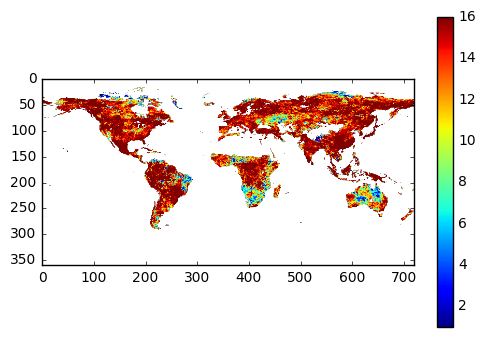

In [31]:
# rank_season_max_index indicates which season ranks highest of the 4 seasons for 2015;
# rank_season_max indicates the rank for the highest-rank season

rank_season_max = ranks_season_mask.max(axis=-1)   # get the corresponding season rank which ranks highest 
                                                   # among all four seasons
rank_season_max_index = np.ma.argmax(ranks_season_mask,axis=-1) + 1  # get season index where this season ranks
                                                                     # highest among all four seasons for 2015 
rank_season_max_index = np.ma.masked_array(rank_season_max_index,mask=mask_empty)  # mask pixels where observations are
                                                                                   # are lacking

rank_season_max_index = np.ma.masked_array(rank_season_max_index,mask=dic_overlap['more_than_one'])

# rank for the highest-rank season
g.imshow(rank_season_max)

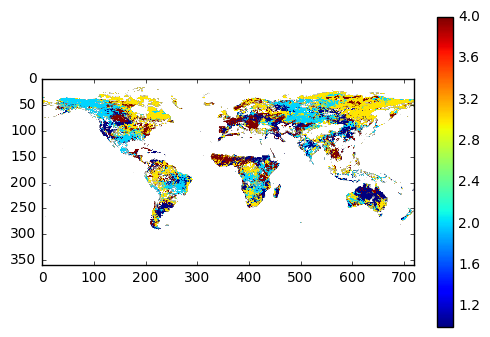

In [32]:
# for which season 2015 ranks highest?
g.imshow(rank_season_max_index)

### Make the plot by using all ranks

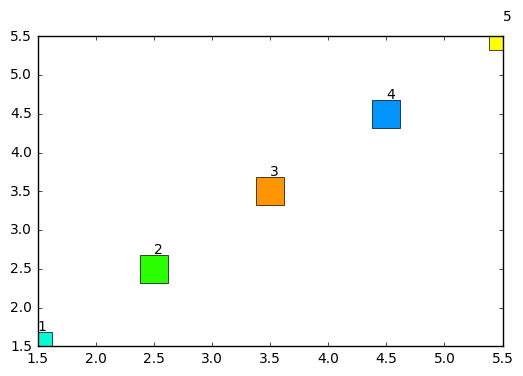

In [33]:
hlist = [170,110,35,205,60]  # hues for Q1,Q2,Q3,Q4,more-than-one-season
mat.rcParams['figure.figsize'] = (6,4)
g.show_hsv(hlist)

# set hue for each season
hdata = np.zeros(rank_season_max_index.shape)
hdata[dic_overlap['more_than_one']] = hlist[-1]                                 
hdata[rank_season_max_index==1] = hlist[0]                                      
hdata[rank_season_max_index==2] = hlist[1]                                      
hdata[rank_season_max_index==3] = hlist[2]                                      
hdata[rank_season_max_index==4] = hlist[3]        

imgdata = np.zeros(rank_Q1.shape+(3,))
imgdata[...,0] = hdata/360.  #set hue
imgdata[...,1] = 1      # saturation all as 1

imgdata[...,2] = rank_season_max/16.
imgdata[...,2] = imgdata[...,2] * 0.9 + 0.1    #brightness as (0.1,1)

In [35]:
imgdata2 = mat.colors.hsv_to_rgb(imgdata)
print imgdata2.shape

#set invalid regions as white
imgdata2[...,0][mask_empty] = 1
imgdata2[...,1][mask_empty] = 1
imgdata2[...,2][mask_empty] = 1

(360, 720, 3)


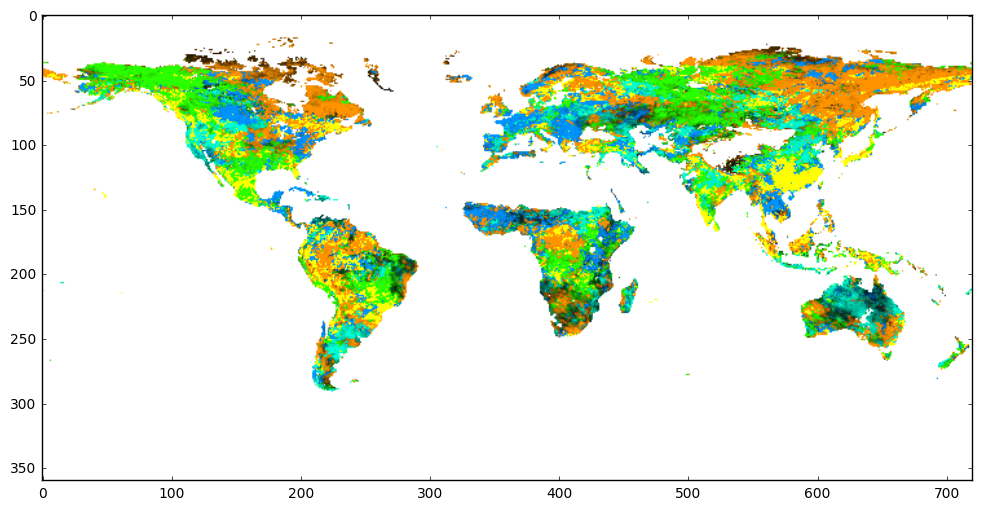

In [36]:
mat.rcParams['figure.figsize'] = (12,6)

plt.imshow(imgdata2,interpolation=None)

In [37]:
bmap.rcParams['Antarctica'] = False

#### Creat the data and make the legend

In [38]:
%matplotlib inline

In [39]:
mat.rcParams['figure.figsize'] = (9,5)

In [40]:
num = 16
legimgdata = np.zeros((len(hlist),num,3))
legimgdata[...,0] = np.tile(np.array(hlist)[:,np.newaxis],(1,num))/360.
legimgdata[...,1] = 1.
legimgdata[...,2] = .8
#legimgdata[...,2] = np.linspace(0,1,num=num,endpoint=True)[np.newaxis,:]
#legimgdata[...,2] = legimgdata[...,2] * 0.9 + 0.1

legrgb = mat.colors.hsv_to_rgb(legimgdata)

In [41]:
# this frac_max is calculated later
frac_max = [9.7,16.0,22.7,16.4,'']

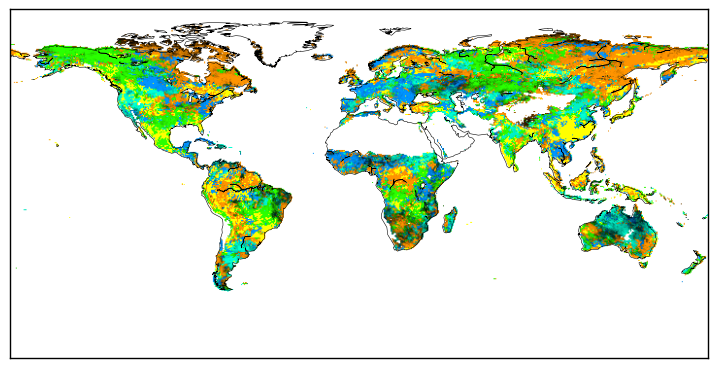

In [42]:
gmap = bmap.gmap(lat=d.lat,lon=d.lon,lwcont=0.4)
gmap.m.imshow(imgdata2[::-1,...])

In [43]:
%matplotlib inline

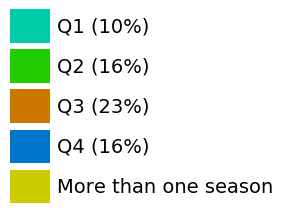

In [46]:
mat.rcParams['figure.figsize'] = (0.5,2.5)

labels = seasons+['More than one season']

fig,axs = plt.subplots(5,1,sharex=True)

for i in range(5):
    ax = axs[i]
    ax.imshow(legrgb[[i],:,:],aspect='auto',interpolation=None)
    ax.tick_params(labelleft='off',axis='both',labelbottom='off')
    ax.tick_params(bottom='off',left='off',right='off',top='off')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    if i in [0,1,2,3]:
        g.Set_AxText(ax,labels[i]+' ({0:2.0f}%)'.format(frac_max[i]),pos=(1.2,0.5),
                     horizontalalignment='left',verticalalignment='center',size=14,color='k')
    else:
        g.Set_AxText(ax,labels[i],pos=(1.2,0.5),
                             horizontalalignment='left',verticalalignment='center',size=14,color='k')
        
plt.subplots_adjust(hspace=0.2)


### Make the map by showing only the highest rank season for 2015

In [115]:
# set hue for each season
hdata = np.zeros(rank_season_max_index.shape)
hdata[dic_overlap['more_than_one']] = hlist[-1]                                 
hdata[rank_season_max_index==1] = hlist[0]                                      
hdata[rank_season_max_index==2] = hlist[1]                                      
hdata[rank_season_max_index==3] = hlist[2]                                      
hdata[rank_season_max_index==4] = hlist[3]        

imgdata = np.zeros(rank_Q1.shape+(3,))
imgdata[...,0] = hdata/360.  #set hue
imgdata[...,1] = 1      # saturation all as 1

imgdata[...,2] = 1 # brightness all as 1

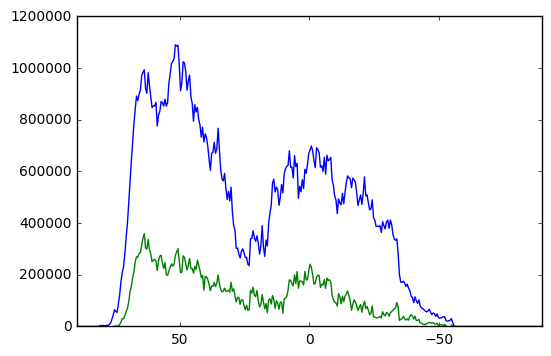

In [53]:
total = np.ma.masked_array(area_km2,rank_season_max_index_2015_highest.mask).sum(axis=1)

q1 = np.ma.masked_array(area_km2, np.ma.masked_not_equal(rank_season_max_index_2015_highest,1).mask).sum(axis=1)
q2 = np.ma.masked_array(area_km2, np.ma.masked_not_equal(rank_season_max_index_2015_highest,2).mask).sum(axis=1)
q3 = np.ma.masked_array(area_km2, np.ma.masked_not_equal(rank_season_max_index_2015_highest,3).mask).sum(axis=1)
q4 = np.ma.masked_array(area_km2, np.ma.masked_not_equal(rank_season_max_index_2015_highest,4).mask).sum(axis=1)


total_all = np.ma.masked_array(area_km2, rank_season_max_index.mask).sum(axis=1)

dic = OrderedDict()
dic['Q1'] = q1
dic['Q2'] = q2
dic['Q3'] = q3
dic['Q4'] = q4
dic['All grid cells'] = total_all

dft = pa.DataFrame(dic)
dft = dft.iloc[:]
dft.index = np.arange(89.75,-90,-0.5)
dft = dft
s_total = pa.Series(total[:],index=np.arange(89.75,-90,-0.5))

#dft.plot()

dft[dft.columns[:]].sum(axis=1).plot()
s_total.plot()

In [55]:
np.ma.masked_array(area_km2, rank_season_max_index.mask).sum()/1e6

99.875486463797756

In [56]:
total_all.sum()/1e6

99.875486463797756

In [57]:
mat.rcParams['figure.figsize'] = (8,4)

/home/users/ychao/python/pylsce/Pdata.py:1942: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  arr[np.isnan(arr)] = 0. #change Nan to zero
/home/share/unix_files/anaconda/4.2.0/lib/python2.7/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


/home/share/unix_files/anaconda/4.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


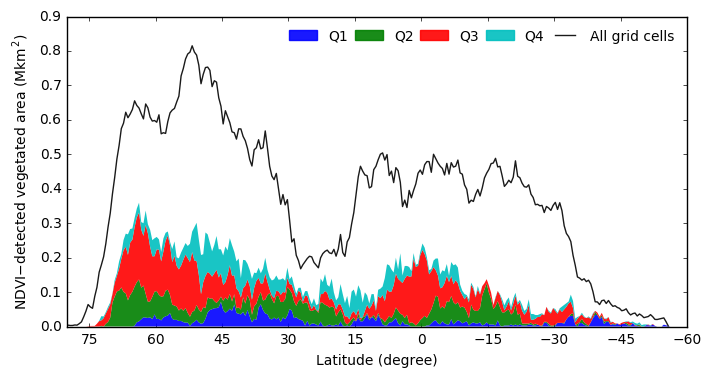

In [58]:
pd = Pdata.Pdata.from_dataframe(dft[dft.columns[:-1]]/1e6)  #change to Mkm2
pd.plot_stackline(fillkw=dict(alpha=0.9,edgecolor='none'))
ax = plt.gca()
ax.set_xticks(np.arange(90,-91,-15));
dt = dft[dft.columns[-1]]/1e6 #change to Mkm2
dt.plot(ax=ax,color='0.1')

pleg = pd.stackline_proleg
pleg.add_line_by_tag('All grid cells',color='0.1')
pleg.create_legend(loc='upper right',ncol=5)

plt.xlim((-60,80))
ax.set_ylabel('NDVI-detected vegetated area ($Mkm^{2}$)')
ax.invert_xaxis()
ax.set_xlabel('Latitude (degree)')

In [59]:
s = dft.ix[80:30].sum()

In [60]:
s

Q1                2.056805e+06
Q2                4.319310e+06
Q3                7.484783e+06
Q4                4.084912e+06
All grid cells    4.950212e+07
dtype: float64

In [61]:
s.iloc[:4].sum()/float(s.iloc[-1])

0.36252611561840714

In [62]:
s/s.iloc[:4].sum()

Q1                0.114612
Q2                0.240686
Q3                0.417077
Q4                0.227625
All grid cells    2.758422
dtype: float64

In [63]:
dt = s/s.iloc[:4].sum()
dt.iloc[:4].sum()

1.0

In [66]:
%matplotlib inline

In [67]:
mat.rcParams['figure.figsize'] = (5,3)

In [68]:
ind_q4 = np.ma.masked_not_equal(rank_season_max_index_2015_highest,4)
ind_q1 = np.ma.masked_not_equal(rank_season_max_index_2015_highest,1)
ind_q1_q4 = ind_q1.filled(0) + ind_q4.filled(0)
ind_q1_q4 = np.ma.masked_equal(ind_q1_q4,0.)

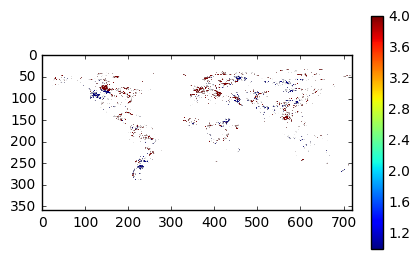

In [69]:
g.imshow(ind_q1_q4)

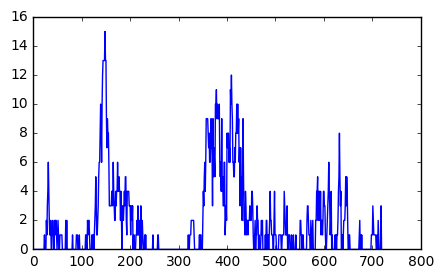

In [71]:
plot(np.logical_not(ind_q4[:90,:].mask).sum(axis=0))

In [72]:
mat.rcParams['figure.figsize'] = (8,3)

In [73]:
glatlon = pb.pfload('/home/users/ychao/python/landmask_et_latlon.pf')

In [74]:
glatlon.globHDlat[120]

29.75

In [75]:
s_q4 = np.logical_not(ind_q4[:120,:].mask).sum(axis=0)
s_q1 = np.logical_not(ind_q1[:120,:].mask).sum(axis=0)
dic = OrderedDict()
dic['Q1'] = s_q1
dic['Q4'] = s_q4
pd = Pdata.Pdata.from_dict(dic,x=glatlon.globHDlon)

In [128]:
dt = np.logical_not(rank_season_max_index.mask)
total_num_grid = dt[:120,:].sum(axis=0)

In [137]:
mat.rcParams['figure.figsize'] = (7,3)

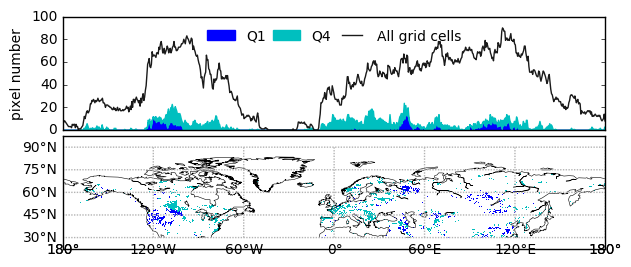

In [147]:
fig,axs = plt.subplots(2,1,sharex=True)
pd.plot_stackline(axes=axs[0],colors=['b','c'])
axs[0].plot(glatlon.globHDlon,total_num_grid,color='0.1')

pleg = pd.stackline_proleg
pleg.add_line_by_tag('All grid cells',color='0.1')
pleg.create_legend(ax=axs[0],loc='upper center',ncol=3)

mimg = bmap.mapimshow(ind_q1_q4[:120,:],lat=glatlon.globHDlat[:120],lon=glatlon.globHDlon,gmapkw=dict(fix_aspect=False),
                      show_colorbar=False,ax=axs[1],gridstep=(15,60),cmap=mat.colors.ListedColormap(['b','c']))
axs[1].set_ylim((30,90))
axs[0].set_xlim((-180,180))
axs[0].set_xticklabels('')
axs[0].set_ylabel('pixel number')
axs[0].set_ylim((0,100))

plt.subplots_adjust(hspace=0.05)

(360, 720, 3)


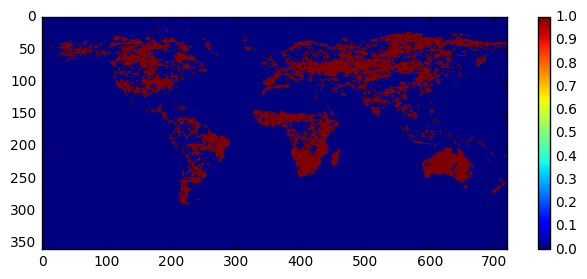

In [79]:
imgdata2 = mat.colors.hsv_to_rgb(imgdata)
print imgdata2.shape

#set invalid regions as white
imgdata2[...,0][mask_empty] = 1
imgdata2[...,1][mask_empty] = 1
imgdata2[...,2][mask_empty] = 1

gray_region = np.logical_and(np.logical_not(arr_2015_highest),np.logical_not(mask_empty))
g.imshow(gray_region)
gray = 160/255.
imgdata2[...,0][gray_region] = gray
imgdata2[...,1][gray_region] = gray
imgdata2[...,2][gray_region] = gray

In [80]:
%matplotlib inline

In [81]:
mat.rcParams['figure.figsize'] = (12,6)

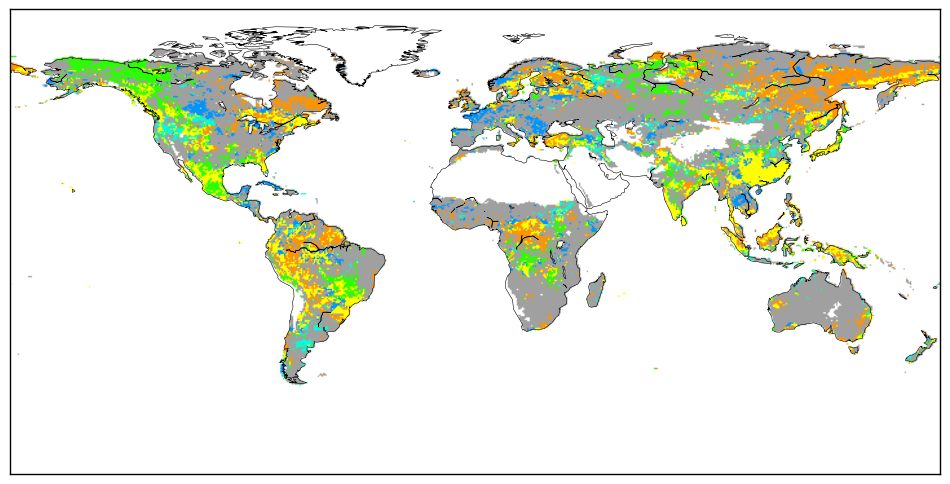

In [82]:
gmap = bmap.gmap(lat=d.lat,lon=d.lon,lwcont=0.4)
gmap.m.imshow(imgdata2[::-1,...])

In [83]:
%matplotlib inline

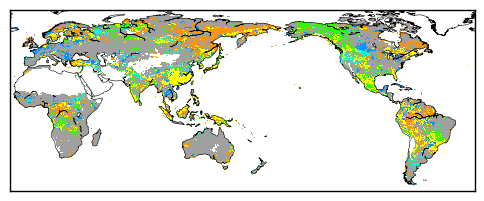

In [84]:
shiftdata = np.concatenate([imgdata2[:,320:,:],imgdata2[:,:400,:]],axis=1)
shiftdata = shiftdata[20:-60]
mimg = bmap.mapimshow(data=shiftdata,lat=np.linspace(90,-90,361)[20:-60],lon=np.linspace(-20,340,720),show_colorbar=False,gridstep=False,shift=False)

### Calculate the vegetation area fractions for each season 

In [85]:
mat.rcParams['figure.figsize'] = (5,3)

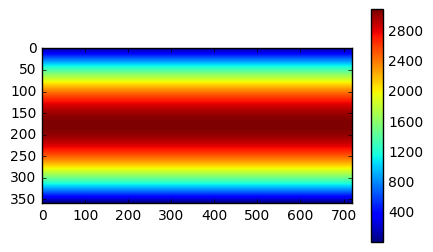

In [86]:
g.imshow(area_km2)

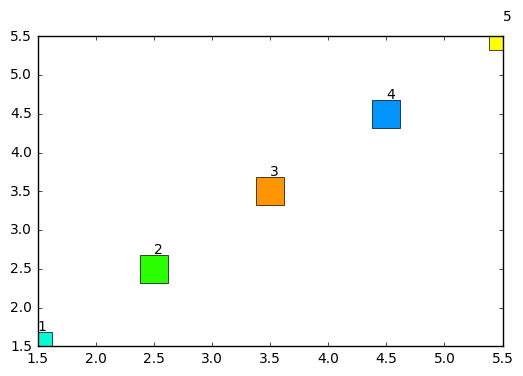

In [87]:
hlist = [170,110,35,205,60]  # hues for Q1,Q2,Q3,Q4,more-than-one-season
mat.rcParams['figure.figsize'] = (6,4)
g.show_hsv(hlist)

In [88]:
ranks_season_mask.shape

(360, 720, 4)

In [89]:
dic2 = OrderedDict()
for i,sea in enumerate(seasons):
    area_mask = np.ma.masked_array(area_km2,mask=ranks_season_mask[...,i].mask)
    dic = d.break_by_region('ndvi',separation=ranks_season_mask[...,i],forcedata=area_km2,pyfunc=lambda x:np.ma.sum(x))
    s = pa.Series(dic)/area_mask.sum()
    dic2[sea] = s
dft = pa.DataFrame(dic2)
dft = dft * 100

dimred_func will be removed in the future!
dimred_func will be removed in the future!
dimred_func will be removed in the future!
dimred_func will be removed in the future!


In [ ]:
# This calculate the csv files needed, uncomment to run the cell.
for year in range(2000,2016):
    data = np.load('/home/orchidee01/ychao/DATA/NDVI/NDVI_{0}_rank_season_Taejin_MOD13C1_Min0.1.npy'.format(year))
    ranks_season_mask = np.ma.masked_invalid(data)
    dic2 = OrderedDict()
    for i,sea in enumerate(seasons):
        area_mask = np.ma.masked_array(area_km2,mask=ranks_season_mask[...,i].mask)
        dic = d.break_by_region('NDVI',separation=ranks_season_mask[...,i],forcedata=area_km2,pyfunc=lambda x:np.ma.sum(x))
        s = pa.Series(dic)/area_mask.sum()
        dic2[sea] = s
    dft = pa.DataFrame(dic2)
    dft = dft * 100
    dft.to_csv('/home/orchidee01/ychao/DATA/NDVI/Area_frac_NDVI_Taejin_MOD13C1_Min0.1_rank_{0}.csv'.format(year))

In [91]:
dft_2015 = dft.copy()

In [92]:
dft.iloc[[0,-1]]

,Q1,Q2,Q3,Q4
1,3.367937,3.631375,3.530553,5.206515
16,9.699317,16.034530,22.697751,16.421821


In [93]:
dft.sum(axis=0)

Q1    100.0
Q2    100.0
Q3    100.0
Q4    100.0
dtype: float64

In [94]:
mat.rcParams['figure.figsize'] = (6,4)

In [95]:
rgblist = g.show_hsv(hlist[:-1],plot=False,get_rgb=True)

(1, 16)

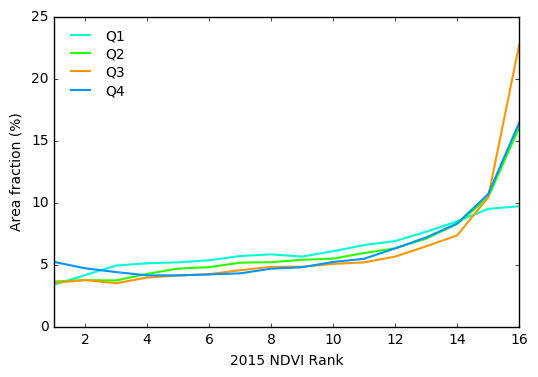

In [96]:
dft.plot(color=rgblist,lw=1.5)
plt.ylabel('Area fraction (%)')
plt.xlabel('2015 NDVI Rank')
plt.xlim(1,16)

In [97]:
## The different csv files are calculated before, there are slight differences 
dic = OrderedDict()
for year in range(2000,2016):
    dft = pa.read_csv('/home/orchidee01/ychao/DATA/NDVI/Area_frac_NDVI_Taejin_MOD13C1_Min0.1_rank_{0}.csv'.format(year),index_col=0)
    dic[year] = dft

panel = pa.Panel(dic)

In [98]:
dft.iloc[[0,-1]]

,Q1,Q2,Q3,Q4
1,3.367937,3.631375,3.530553,5.206515
16,9.699317,16.034530,22.697751,16.421821


In [99]:
dft_frac = panel.major_xs(16).T
print dft_frac.sum(axis=0)
dft_frac = dft_frac/dft_frac.sum(axis=0) * 100.
print dft_frac.sum(axis=0)

Q1    109.358289
Q2    101.838550
Q3    101.082876
Q4    104.962042
dtype: float64
Q1    100.0
Q2    100.0
Q3    100.0
Q4    100.0
dtype: float64


In [100]:
seasons_explain = ['Q1 (January to March)','Q2 (April to June)',
                   'Q3 (July to September)','Q4 (October to December)']

In [101]:
dft_frac.tail(2)

,Q1,Q2,Q3,Q4
2014,14.287362,11.730905,5.055218,6.028646
2015,8.869302,15.745050,22.454596,15.645485


In [102]:
dft_frac.mean(axis=1)

2000     3.656351
2001     4.092125
2002     4.574985
2003     3.453319
2004     4.195620
2005     4.485574
2006     5.439859
2007     5.716113
2008     3.664037
2009     4.295511
2010     6.681702
2011     8.759381
2012     7.785278
2013     8.246005
2014     9.275533
2015    15.678608
dtype: float64

In [103]:
dft_frac.Q1.sort_values()

2000     1.505240
2004     3.426295
2009     3.548133
2003     3.934592
2001     4.016289
2008     4.813511
2005     5.320164
2002     5.487945
2010     6.352163
2006     6.366403
2012     6.423317
2013     7.007325
2007     7.776065
2015     8.869302
2011    10.865895
2014    14.287362
Name: Q1, dtype: float64

In [104]:
dft_frac.iloc[-1].mean()

15.678608118264016

In [105]:
%matplotlib inline

In [106]:
mat.rcParams['figure.figsize'] = (7,4)

In [107]:
mat.rcParams['xtick.labelsize'] = 10
mat.rcParams['ytick.labelsize'] = 10
mat.rcParams['axes.labelsize'] = 10

(2000, 2016)

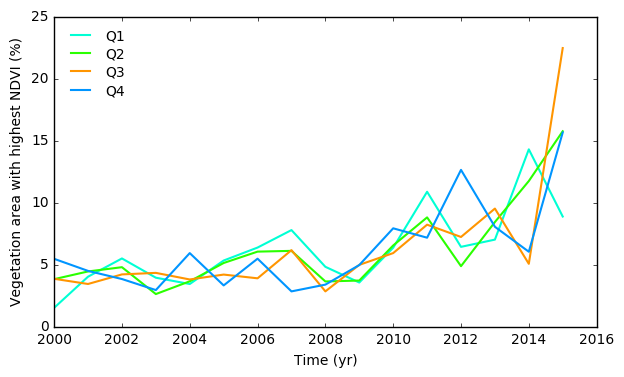

In [108]:
# make Fig. 1b
dft_frac.plot(color=rgblist+['0.3'],lw=1.5)
ax = plt.gca()

ax.set_xlabel('Time (yr)',size=10)
ax.set_ylabel('Vegetation area with highest NDVI (%)',size=10)
plt.legend(loc='upper left',frameon=False)
plt.xlim(2000,2016)

In [109]:
100/16.

6.25

In [110]:
xlen,ylen,_ = shiftdata.shape

In [111]:
%matplotlib inline

#### Combine Fig. 1a and 1b

In [112]:
mat.rcParams['figure.figsize'] = (6,5)

<class 'LabelAxes.LabelAxes'>
tags:
(a),(b)

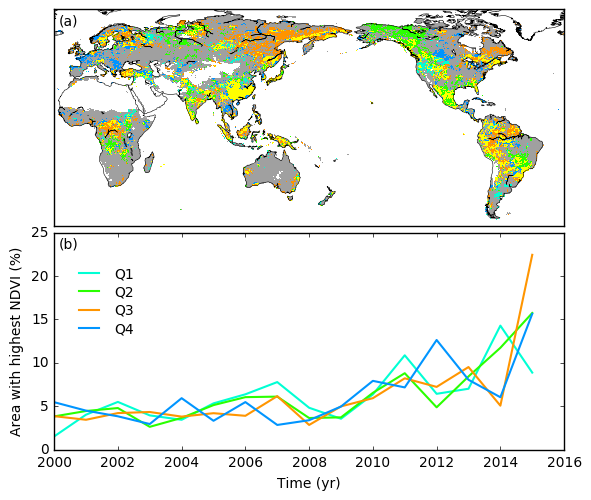

In [113]:
fig,axs = plt.subplots(2,1)

plt.subplots_adjust(hspace=0.03,top=0.98,left=0.1,right=0.95,bottom=0.1)

shiftdata = np.concatenate([imgdata2[:,320:,:],imgdata2[:,:400,:]],axis=1)
shiftdata = shiftdata[20:-60]
mimg = bmap.mapimshow(ax=axs[0],data=shiftdata,lat=np.linspace(90,-90,361)[20:-60],lon=np.linspace(-20,340,720),
                      show_colorbar=False,gridstep=False,shift=False,aspect='auto',interpolation='none')



dft_frac.plot(color=rgblist+['0.3'],lw=1.5,ax=axs[1])
ax = plt.gca()
ax.set_xlabel('Time (yr)',size=10)
ax.set_ylabel('Area with highest NDVI (%)',size=10)
plt.legend(loc=(0.03,0.5),frameon=False,ncol=1)
plt.xlim(2000,2016)

LabelAxes.label_axl(axs,size=10,pos=(0.01,0.93))